In [11]:
import pandas as pd
import os
import data_prep
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# load in our training dataset (full_data)
path=os.getcwd()
data_filename = os.path.join(path, "full_data.csv")
data_df = pd.read_csv(data_filename, index_col=None, header=0)
data_df = data_df.drop(['Unnamed: 0'], axis=1)

print(data_df.shape)
data_df = data_prep.nan_to_median(data_df)
print(data_df.shape)


(55875, 25)
(55875, 25)


In [5]:
data_df.head(10)

,Unnamed: 0,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
0,25330,201,39.478178,-0.383541,27,1.412114e+09,2014,10,1,0,...,21.3,85.0,855.3,0.0,2.5,4.000000,3.833333,4.000000,3.833333,1.0
1,25331,201,39.478178,-0.383541,27,1.412118e+09,2014,10,1,1,...,21.1,86.0,1000.6,0.0,4.5,-0.666667,2.083333,-0.666667,2.083333,0.0
2,25332,201,39.478178,-0.383541,27,1.412122e+09,2014,10,1,2,...,20.9,86.0,880.6,0.0,4.5,-2.333333,1.958333,-2.333333,1.958333,0.0
3,25333,201,39.478178,-0.383541,27,1.412125e+09,2014,10,1,3,...,20.4,88.0,859.8,0.0,3.0,-2.000000,1.666667,-2.000000,1.666667,0.0
4,25334,201,39.478178,-0.383541,27,1.412129e+09,2014,10,1,4,...,20.3,87.0,898.1,0.0,2.0,-0.583333,1.250000,-0.583333,1.250000,0.0
5,25335,201,39.478178,-0.383541,27,1.412132e+09,2014,10,1,5,...,20.1,88.0,910.6,0.0,2.0,-0.458333,1.250000,-0.458333,1.250000,0.0
6,25336,201,39.478178,-0.383541,27,1.412136e+09,2014,10,1,6,...,19.6,89.0,908.1,0.0,0.0,-0.708333,0.833333,-0.708333,0.833333,0.0
7,25337,201,39.478178,-0.383541,27,1.412140e+09,2014,10,1,7,...,19.7,89.0,987.8,0.0,1.0,2.125000,3.875000,2.125000,3.875000,0.0
8,25338,201,39.478178,-0.383541,27,1.412143e+09,2014,10,1,8,...,19.8,88.0,971.3,0.0,1.0,8.625000,10.000000,8.625000,10.000000,8.0
9,25339,201,39.478178,-0.383541,27,1.412147e+09,2014,10,1,9,...,20.1,87.0,983.1,0.0,0.0,6.000000,6.833333,6.000000,6.833333,6.0


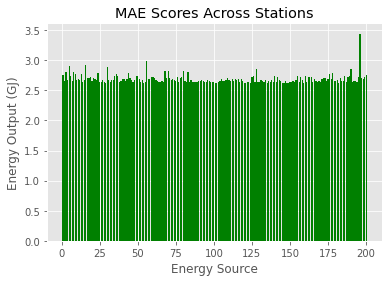

Smallest MAE: 2.6226866438078673
Best performing station: 120


In [76]:
# The goal: run every model_station_X_rlm_short_full_temp on the full_data and store the MAE (this cell is improved upon by the following cell so can ignore)

station_numbers = list(range(1,201))

mae_store = []
for station_num in station_numbers:
    # load in the model
    model_filename = os.path.join(path, "morebikes2020/Models/Models/model_station_{}_rlm_short_full_temp.csv".format(station_num))
    model_df = pd.read_csv(model_filename, index_col="feature")

    # Get all the model features
    model_index = model_df.index.values.tolist() 
    intercept_val = model_df["weight"][model_index[0]]
    model_features = model_index[1:]

    # Plug into equation
    preds = (sum(model_df["weight"][feature]*data_df[feature] for feature in model_features)) + intercept_val

    # Evaluate
    mae = abs(data_df['bikes'] - preds).mean()

    # Save the MAE 
    mae_store.append(mae)

plt.bar(station_numbers, mae_store, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("MAE Scores Across Stations")

# plt.xticks(station_numbers, x)

plt.show()
print("Smallest MAE: {}".format(min(mae_store)))
print("Best performing station: {}".format(mae_store.index(min(mae_store))+1))



In [78]:
# The goal: run every single model on the full_data and store the MAE and find the best performing station

station_numbers = list(range(1,201))
model_extentions = ["{}_rlm_full_temp.csv", "{}_rlm_full.csv", "{}_rlm_short_full_temp.csv", "{}_rlm_short_full.csv", 
"{}_rlm_short_temp.csv", "{}_rlm_short.csv"]

#model_extentions = ["{}_rlm_short_full_temp.csv"]


mae_store = {}
for station_num in station_numbers:
    for extention in model_extentions:

        # load in the model
        model_id = extention.format(station_num)
        model_filename = os.path.join(path, "morebikes2020/Models/Models/model_station_" + model_id)
        model_df = pd.read_csv(model_filename, index_col="feature")

        # Get all the model features
        model_index = model_df.index.values.tolist() 
        intercept_val = model_df["weight"][model_index[0]]
        model_features = model_index[1:]

        # Plug into equation
        preds = (sum(model_df["weight"][feature]*data_df[feature] for feature in model_features)) + intercept_val

        # Evaluate
        mae = abs(data_df['bikes'] - preds).mean()

        # Save the MAE 
        mae_store[model_id]= mae


# Find the minimum value
minval = min(mae_store.values())
best_stations = [k for k, v in mae_store.items() if v==minval]


print("Smallest MAE: {}".format(minval))
print("Best performing station: {}".format(best_stations))


Smallest MAE: 2.6226866438078673
Best performing station: ['120_rlm_short_full_temp.csv']


In [85]:
# Now get the output of that model and add it as a feature to the full_data file

# load in the best model
model_filename = os.path.join(path, "morebikes2020/Models/Models/model_station_120_rlm_short_full_temp.csv")
model_df = pd.read_csv(model_filename, index_col="feature")

# Get model features and intercept
model_index = model_df.index.values.tolist() 
intercept_val = model_df["weight"][model_index[0]]
model_features = model_index[1:]

# Plug into equation
preds = (sum(model_df["weight"][feature]*data_df[feature] for feature in model_features)) + intercept_val
data_df['rlm_output'] = preds

print(abs(data_df['bikes'] - preds).mean())

2.6226866438078673


In [12]:
# Save data file with rlm output as an additional feature
# data_df.to_csv("RLM_full_data.csv", index=False)